In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
import numpy as np
import pandas as pd


In [14]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan Pred/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan Pred/test.csv')

In [15]:
df.shape

(614, 13)

In [16]:
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

aa = df.corr()
aa

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


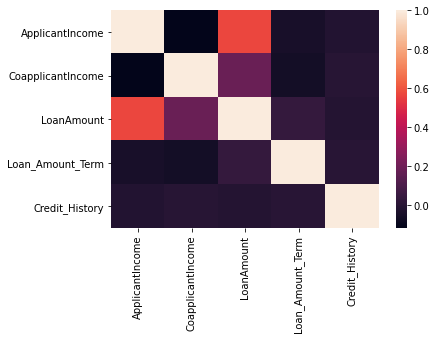

In [20]:
sns.heatmap(aa)

In [21]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [22]:
df_test['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [23]:
print(df.isnull().sum())
print(df_test.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64


In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [25]:
df_test['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [26]:
print(df.isnull().sum())
print(df_test.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [27]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df_test['Total_income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

In [28]:
df = pd.get_dummies(data=df,columns=['Gender','Self_Employed','Married','Education','Property_Area'])
df_test = pd.get_dummies(data=df_test,columns=['Gender','Self_Employed','Married','Education','Property_Area'])

In [29]:
df['Loan_status'] = pd.Series(np.where(df.Loan_Status.values == 'Y', 1, 0),
          df.index)

In [30]:
df = df.drop(columns=['Loan_Status','Self_Employed_No','Gender_Male','Married_No','Education_Not Graduate','Property_Area_Rural'],axis=1)
df_test = df_test.drop(columns=['Self_Employed_No','Gender_Male','Married_No','Education_Not Graduate','Property_Area_Rural'],axis=1)



In [31]:
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    object 
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Total_income             614 non-null    float64
 8   Gender_Female            614 non-null    uint8  
 9   Self_Employed_Yes        614 non-null    uint8  
 10  Married_Yes              614 non-null    uint8  
 11  Education_Graduate       614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Loan_status              6

In [32]:
df = df.drop(columns=['ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1)
df_test = df_test.drop(columns=['ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1)

In [33]:
print(df['Dependents'].value_counts())
print(df_test['Dependents'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [34]:
def process_dependents():
    global df
    df['Singleton'] = df['Dependents'].map(lambda d: 1 if d=='0' else 0)
    df['Small_Family'] = df['Dependents'].map(lambda d: 1 if d=='1' else 0)
    df['Medium_Family'] = df['Dependents'].map(lambda d: 1 if d=='2' else 0)
    df['Large_Family'] = df['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    df.drop(['Dependents'], axis=1, inplace=True)

In [35]:
def process_dependents_test():
    global df_test
    df_test['Singleton'] = df_test['Dependents'].map(lambda d: 1 if d=='0' else 0)
    df_test['Small_Family'] = df_test['Dependents'].map(lambda d: 1 if d=='1' else 0)
    df_test['Medium_Family'] = df_test['Dependents'].map(lambda d: 1 if d=='2' else 0)
    df_test['Large_Family'] = df_test['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    df_test.drop(['Dependents'], axis=1, inplace=True)

In [36]:
process_dependents()
process_dependents_test()

In [37]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [38]:
r = 0.09
A = df['LoanAmount']*r*(1+r)**df['Loan_Amount_Term']
B = (1+r)**(df['Loan_Amount_Term']-1)
df['EMI'] = A/B


In [39]:
df.head(20)

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Female,Self_Employed_Yes,Married_Yes,Education_Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_status,Singleton,Small_Family,Medium_Family,Large_Family,EMI
0,128.0,360.0,1.0,5849.0,0,0,0,1,0,1,1,1,0,0,0,12.5568
1,128.0,360.0,1.0,6091.0,0,0,1,1,0,0,0,0,1,0,0,12.5568
2,66.0,360.0,1.0,3000.0,0,1,1,1,0,1,1,1,0,0,0,6.4746
3,120.0,360.0,1.0,4941.0,0,0,1,0,0,1,1,1,0,0,0,11.7720
4,141.0,360.0,1.0,6000.0,0,0,0,1,0,1,1,1,0,0,0,13.8321
5,267.0,360.0,1.0,9613.0,0,1,1,1,0,1,1,0,0,1,0,26.1927
6,95.0,360.0,1.0,3849.0,0,0,1,0,0,1,1,1,0,0,0,9.3195
7,158.0,360.0,0.0,5540.0,0,0,1,1,1,0,0,0,0,0,1,15.4998
8,168.0,360.0,1.0,5532.0,0,0,1,1,0,1,1,0,0,1,0,16.4808
9,349.0,360.0,1.0,23809.0,0,0,1,1,1,0,0,0,1,0,0,34.2369


In [40]:
#r = 0.09
A1 = df_test['LoanAmount']*r*(1+r)**df_test['Loan_Amount_Term']
B1 = (1+r)**(df_test['Loan_Amount_Term']-1)
df_test['EMI'] = A1/B1


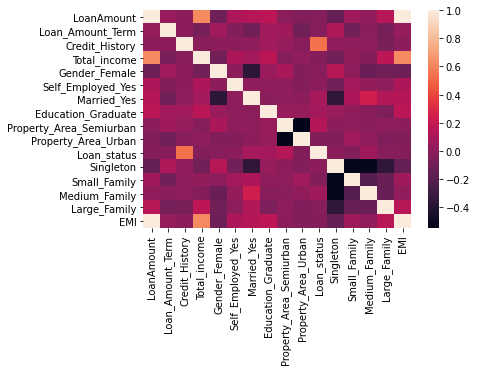

In [41]:
#sns.heatmap(df.corr())

In [96]:
df = df.drop(['LoanAmount','Loan_Amount_Term','Large_Family'], axis=1)
df_test = df_test.drop(['LoanAmount','Loan_Amount_Term','Large_Family'], axis=1)



In [97]:
df_test.head()


,Credit_History,Total_income,Gender_Female,Self_Employed_Yes,Married_Yes,Education_Graduate,Property_Area_Semiurban,Property_Area_Urban,Singleton,Small_Family,Medium_Family,EMI
0,1.0,5720,0,0,1,1,0,1,1,0,0,10.7910
1,1.0,4576,0,0,1,1,0,1,0,1,0,12.3606
2,1.0,6800,0,0,1,1,0,1,0,0,1,20.4048
3,1.0,4886,0,0,1,1,0,1,0,0,1,9.8100
4,1.0,3276,0,0,0,0,0,1,1,0,0,7.6518


In [98]:
df.head()

,Credit_History,Total_income,Gender_Female,Self_Employed_Yes,Married_Yes,Education_Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_status,Singleton,Small_Family,Medium_Family,EMI
0,1.0,5849.0,0,0,0,1,0,1,1,1,0,0,12.5568
1,1.0,6091.0,0,0,1,1,0,0,0,0,1,0,12.5568
2,1.0,3000.0,0,1,1,1,0,1,1,1,0,0,6.4746
3,1.0,4941.0,0,0,1,0,0,1,1,1,0,0,11.7720
4,1.0,6000.0,0,0,0,1,0,1,1,1,0,0,13.8321


In [99]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Loan_status')
y = df['Loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (491, 12), X_test size: (123, 12)


In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

In [102]:
# Initialising the ANN
classifier = Sequential()

In [103]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01),activation='relu', input_dim=12))

In [104]:
# Adding the second hidden layer
#classifier.add(Dense(units=7, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01),activation='relu'))

In [105]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',kernel_regularizer=l2(0.01), activation='sigmoid'))

In [106]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse','accuracy'])

In [107]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=5, validation_split=0.33, epochs=40)

Train on 328 samples, validate on 163 samples
Epoch 1/40
328/328 [==============================] - 0s 620us/step - loss: 1.0914 - mse: 0.3061 - accuracy: 0.4787 - val_loss: 1.0513 - val_mse: 0.2974 - val_accuracy: 0.4847
Epoch 2/40
328/328 [==============================] - 0s 321us/step - loss: 0.9810 - mse: 0.2693 - accuracy: 0.5640 - val_loss: 0.9698 - val_mse: 0.2697 - val_accuracy: 0.5153
Epoch 3/40
328/328 [==============================] - 0s 327us/step - loss: 0.9062 - mse: 0.2440 - accuracy: 0.6128 - val_loss: 0.9137 - val_mse: 0.2511 - val_accuracy: 0.5890
Epoch 4/40
328/328 [==============================] - 0s 328us/step - loss: 0.8518 - mse: 0.2260 - accuracy: 0.6768 - val_loss: 0.8682 - val_mse: 0.2364 - val_accuracy: 0.6748
Epoch 5/40
328/328 [==============================] - 0s 312us/step - loss: 0.8085 - mse: 0.2123 - accuracy: 0.7043 - val_loss: 0.8315 - val_mse: 0.2250 - val_accuracy: 0.6564
Epoch 6/40
328/328 [==============================] - 0s 318us/step - loss

In [108]:
# List all data in history
model_history.history.keys()

dict_keys(['val_loss', 'val_mse', 'val_accuracy', 'loss', 'mse', 'accuracy'])

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

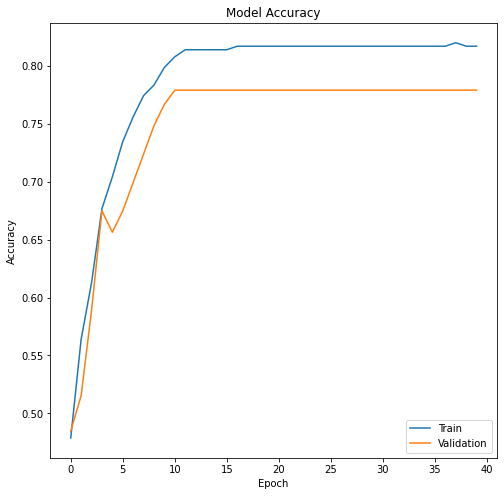

In [110]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

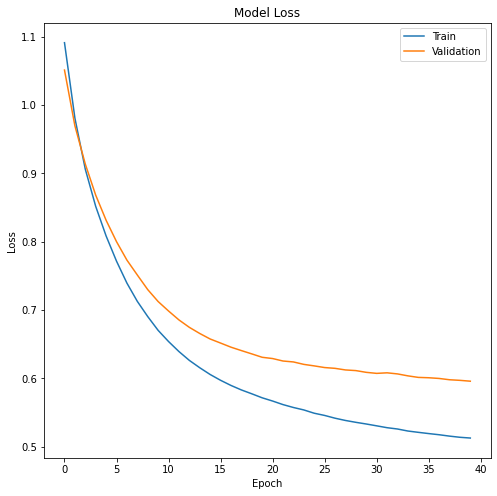

In [111]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [112]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [113]:
y_pred

array([[0.80177605],
       [0.8887114 ],
       [0.80347085],
       [0.83703554],
       [0.87953126],
       [0.09863856],
       [0.74027455],
       [0.74346644],
       [0.08532077],
       [0.864562  ],
       [0.88499415],
       [0.77631354],
       [0.86677814],
       [0.8886037 ],
       [0.8768915 ],
       [0.7342345 ],
       [0.7091737 ],
       [0.71662104],
       [0.7884668 ],
       [0.07203037],
       [0.1010268 ],
       [0.8624692 ],
       [0.8141838 ],
       [0.7259939 ],
       [0.7511606 ],
       [0.82151854],
       [0.7974117 ],
       [0.8714257 ],
       [0.12482387],
       [0.11629084],
       [0.8585707 ],
       [0.7066992 ],
       [0.68976617],
       [0.72390586],
       [0.8688234 ],
       [0.10223806],
       [0.85928845],
       [0.67543733],
       [0.86616635],
       [0.8280282 ],
       [0.8252842 ],
       [0.13277197],
       [0.78574866],
       [0.68510807],
       [0.8074158 ],
       [0.66055965],
       [0.7752122 ],
       [0.888

In [114]:
 y_pred = (y_pred > 0.5)


In [115]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]])

In [116]:
# Calculate the Accuracy
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
score = f1_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(round(score*100,2)))

The accuracy for ANN model is: 89.34%


In [123]:
df_test = np.array(df_test)
df_test= sc.transform(df_test)
prediction = classifier.predict(df_test)
prediction>0.5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

# Comparison with Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini', random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [119]:
rfc_pred_train = rfc.predict(X_train)

In [120]:
from sklearn.metrics import f1_score
#f1_score(y_train,rfc_pred_train)

In [121]:
rfc_pred_test = rfc.predict(X_test)
score = f1_score(rfc_pred_test,y_test)
print('The accuracy for Random Forest model is: {}%'.format(round(score*100,2)))

The accuracy for Random Forest model is: 86.91%


In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred_test)
cm

array([[15, 18],
       [ 7, 83]])